# The saddest Depeche Mode album ?
This notebook was made as part of my own phyton ternig. It's based on data available from the spotify. Web API from https://developer.spotify.com/documentation/web-api/ was used to download the data. 


The aim of the project is to show the saddest album of the band Depche Mode, and to show the change of a given feature over the years of the band's work.The measure of sadness is feature information for a single track available in spotify

# **Data preparation.**

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd



Artist_uri = 'spotify:artist:762310PdDnwsDxAQxzQkfX'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id ='4b507bf1953f4cc29775cfe072bdd235',client_secret = '77e7d9f7c5224b89a47b5df7a552edae'),)
results = spotify.artist_albums(Artist_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])



In [2]:
df = pd.DataFrame(albums)

In [3]:
dffilter =  df[df["name"].str.contains('Tour|Live|Remastered|Singles|101|Release') == False]

In [4]:

dffilter = dffilter.groupby(pd.DatetimeIndex(dffilter['release_date']).year).first()

In [5]:
FiltersAlbum= dffilter[['id','images','name','release_date','total_tracks']]
FiltersAlbum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1981 to 2017
Data columns (total 5 columns):
id              15 non-null object
images          15 non-null object
name            15 non-null object
release_date    15 non-null object
total_tracks    15 non-null int64
dtypes: int64(1), object(4)
memory usage: 720.0+ bytes


In [6]:
FiltersAlbum.index.names = ['Year']

In [8]:
FiltersAlbum.rename(columns={'id':'id_album'}, inplace=True)

In [9]:
FiltersAlbum

,id_album,images,name,release_date,total_tracks
Year,,,,,
1981,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16
1982,4QTkJvr6vfj3MuOqnSpMfE,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",A Broken Frame (2006 Remaster),1982-09-27,19
1983,6oFsq13ql71yK5Gaar7eIy,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Construction Time Again (2007 Remaster),1983-09-14,17
1984,7DbpWj9i5uZ1UggeGRo1LZ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Some Great Reward (2006 Remaster),1984-09-24,17
1985,1fuXkfdOh71JbMvOLIXpX9,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Catching Up with Depeche Mode,1985-11-11,13
1986,0JSOfVzxVTpyvxzXggc8rG,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Black Celebration,1986-03-17,12
1987,4tPRXghD4ago6NYyyfrtES,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Music for the Masses (2006 Remaster),1987-09-28,15
1990,5g3Yi15plTSMaq6tYiuw8p,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Violator (2006 Remaster),1990-03-19,15
1993,1nHX4rMCk0NIBSplCjioCb,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Songs of Faith and Devotion (2006 Remaster),1993-03-22,18


In [10]:
def get_album_tracks(id):

        results = spotify.album_tracks(id,limit=50, offset=0)
        for track in results['items']:
               track.update({'id_album': id})
        album_tracks = results['items']
        while results['next']:
            results = sp.next(results)
            album_tracks.extend(results['items'])
       
        return album_tracks

In [11]:
albums_tracks =[]
for IdValue in FiltersAlbum["id_album"]:
        results = get_album_tracks(IdValue)
        album_tracks= results  
        albums_tracks.extend(album_tracks)
        
        
    



In [13]:
dtracks = pd.DataFrame( albums_tracks)

In [14]:
dtracks

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,is_local,name,preview_url,track_number,type,uri,id_album
0,[{'external_urls': {'spotify': 'https://open.s...,"[CA, MX, US]",1,225760,False,{'spotify': 'https://open.spotify.com/track/3A...,https://api.spotify.com/v1/tracks/3AxeQ3sbQtOH...,3AxeQ3sbQtOHu7WzIysAai,False,New Life - 2006 Remaster,https://p.scdn.co/mp3-preview/b9ed0161efbf041d...,1,track,spotify:track:3AxeQ3sbQtOHu7WzIysAai,0ntg4L6zjosDII94zoyboq
1,[{'external_urls': {'spotify': 'https://open.s...,"[CA, MX, US]",1,138293,False,{'spotify': 'https://open.spotify.com/track/0o...,https://api.spotify.com/v1/tracks/0oW2PIDSeeaU...,0oW2PIDSeeaUor5Xh1V8wv,False,I Sometimes Wish I Was Dead - 2006 Remaster,https://p.scdn.co/mp3-preview/6c390deca7e0402d...,2,track,spotify:track:0oW2PIDSeeaUor5Xh1V8wv,0ntg4L6zjosDII94zoyboq
2,[{'external_urls': {'spotify': 'https://open.s...,"[CA, MX, US]",1,235640,False,{'spotify': 'https://open.spotify.com/track/32...,https://api.spotify.com/v1/tracks/32cZT0BWrxV8...,32cZT0BWrxV8IFTaibRN2m,False,Puppets - 2006 Remaster,https://p.scdn.co/mp3-preview/55939ac6fa2a63d7...,3,track,spotify:track:32cZT0BWrxV8IFTaibRN2m,0ntg4L6zjosDII94zoyboq
3,[{'external_urls': {'spotify': 'https://open.s...,"[CA, MX, US]",1,186320,False,{'spotify': 'https://open.spotify.com/track/1j...,https://api.spotify.com/v1/tracks/1j03bh2DGTWP...,1j03bh2DGTWPzGv7WdHGP1,False,Boys Say Go! - 2006 Remaster,https://p.scdn.co/mp3-preview/400505f4faf6e326...,4,track,spotify:track:1j03bh2DGTWPzGv7WdHGP1,0ntg4L6zjosDII94zoyboq
4,[{'external_urls': {'spotify': 'https://open.s...,"[CA, MX, US]",1,254893,False,{'spotify': 'https://open.spotify.com/track/1T...,https://api.spotify.com/v1/tracks/1TJGkzbdOed1...,1TJGkzbdOed1oEJvW91RE4,False,Nodisco! - 2006 Remaster,https://p.scdn.co/mp3-preview/3206a4e8d223debc...,5,track,spotify:track:1TJGkzbdOed1oEJvW91RE4,0ntg4L6zjosDII94zoyboq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,266973,False,{'spotify': 'https://open.spotify.com/track/25...,https://api.spotify.com/v1/tracks/25cUU1wDvV16...,25cUU1wDvV16JVIAaCmgWO,False,Cover Me - Alt Out,https://p.scdn.co/mp3-preview/7da89bc560100723...,13,track,spotify:track:25cUU1wDvV16JVIAaCmgWO,4WkYJeMlLaNN1x5klAgeJu
267,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,326226,False,{'spotify': 'https://open.spotify.com/track/3E...,https://api.spotify.com/v1/tracks/3EMZwicI8R1S...,3EMZwicI8R1S1dl7OMoRs7,False,Scum - Frenetic Mix,https://p.scdn.co/mp3-preview/8b01916b5c63a895...,14,track,spotify:track:3EMZwicI8R1S1dl7OMoRs7,4WkYJeMlLaNN1x5klAgeJu
268,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,256320,False,{'spotify': 'https://open.spotify.com/track/2a...,https://api.spotify.com/v1/tracks/2aQLYh29MQAc...,2aQLYh29MQAcEKIZ1eV3rx,False,Poison Heart - Tripped Mix,https://p.scdn.co/mp3-preview/98b4608ab2e5534c...,15,track,spotify:track:2aQLYh29MQAcEKIZ1eV3rx,4WkYJeMlLaNN1x5klAgeJu
269,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,337653,False,{'spotify': 'https://open.spotify.com/track/2R...,https://api.spotify.com/v1/tracks/2RPYRtdwtPFm...,2RPYRtdwtPFmSKQfAc9OW9,False,Fail - Cinematic Cut,https://p.scdn.co/mp3-preview/4a92c5edb57ee0a8...,16,track,spotify:track:2RPYRtdwtPFmSKQfAc9OW9,4WkYJeMlLaNN1x5klAgeJu


In [15]:
dtracks = dtracks[['duration_ms','id','name','track_number','id_album']]

In [16]:
dtracks.rename(columns={'id':'id_track', 'name':'track_name'}, inplace=True)

In [17]:
dtracks

,duration_ms,id_track,track_name,track_number,id_album
0,225760,3AxeQ3sbQtOHu7WzIysAai,New Life - 2006 Remaster,1,0ntg4L6zjosDII94zoyboq
1,138293,0oW2PIDSeeaUor5Xh1V8wv,I Sometimes Wish I Was Dead - 2006 Remaster,2,0ntg4L6zjosDII94zoyboq
2,235640,32cZT0BWrxV8IFTaibRN2m,Puppets - 2006 Remaster,3,0ntg4L6zjosDII94zoyboq
3,186320,1j03bh2DGTWPzGv7WdHGP1,Boys Say Go! - 2006 Remaster,4,0ntg4L6zjosDII94zoyboq
4,254893,1TJGkzbdOed1oEJvW91RE4,Nodisco! - 2006 Remaster,5,0ntg4L6zjosDII94zoyboq
...,...,...,...,...,...
266,266973,25cUU1wDvV16JVIAaCmgWO,Cover Me - Alt Out,13,4WkYJeMlLaNN1x5klAgeJu
267,326226,3EMZwicI8R1S1dl7OMoRs7,Scum - Frenetic Mix,14,4WkYJeMlLaNN1x5klAgeJu
268,256320,2aQLYh29MQAcEKIZ1eV3rx,Poison Heart - Tripped Mix,15,4WkYJeMlLaNN1x5klAgeJu
269,337653,2RPYRtdwtPFmSKQfAc9OW9,Fail - Cinematic Cut,16,4WkYJeMlLaNN1x5klAgeJu


In [18]:
DfAlbum_track = result = pd.merge(dtracks, FiltersAlbum, how='left', on=['id_album', 'id_album'])

In [19]:
DfAlbum_track.head()

,duration_ms,id_track,track_name,track_number,id_album,images,name,release_date,total_tracks
0,225760,3AxeQ3sbQtOHu7WzIysAai,New Life - 2006 Remaster,1,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16
1,138293,0oW2PIDSeeaUor5Xh1V8wv,I Sometimes Wish I Was Dead - 2006 Remaster,2,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16
2,235640,32cZT0BWrxV8IFTaibRN2m,Puppets - 2006 Remaster,3,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16
3,186320,1j03bh2DGTWPzGv7WdHGP1,Boys Say Go! - 2006 Remaster,4,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16
4,254893,1TJGkzbdOed1oEJvW91RE4,Nodisco! - 2006 Remaster,5,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16


In [20]:
def get_feature_tracks(id):

       
        track_feature = spotify.audio_features(id)
       
        return track_feature



In [21]:
feature_tracks =[]
for IdValue in DfAlbum_track["id_track"]:
        results = get_feature_tracks(IdValue)
        feature_track= results  
        feature_tracks.extend(feature_track)
        

retrying after...1secs


In [25]:
dffeature_tracks = pd.DataFrame(feature_tracks)

In [26]:
dffeature_tracks.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.665,0.878,7,-7.940,1,0.0435,0.13300,0.3970,0.0827,0.712,158.127,audio_features,3AxeQ3sbQtOHu7WzIysAai,spotify:track:3AxeQ3sbQtOHu7WzIysAai,https://api.spotify.com/v1/tracks/3AxeQ3sbQtOH...,https://api.spotify.com/v1/audio-analysis/3Axe...,225760,4
1,0.745,0.867,2,-9.092,1,0.0423,0.00191,0.1080,0.3160,0.462,129.294,audio_features,0oW2PIDSeeaUor5Xh1V8wv,spotify:track:0oW2PIDSeeaUor5Xh1V8wv,https://api.spotify.com/v1/tracks/0oW2PIDSeeaU...,https://api.spotify.com/v1/audio-analysis/0oW2...,138293,4
2,0.840,0.865,2,-9.283,1,0.0489,0.06280,0.7240,0.1270,0.914,123.948,audio_features,32cZT0BWrxV8IFTaibRN2m,spotify:track:32cZT0BWrxV8IFTaibRN2m,https://api.spotify.com/v1/tracks/32cZT0BWrxV8...,https://api.spotify.com/v1/audio-analysis/32cZ...,235640,4
3,0.844,0.687,7,-9.404,0,0.0569,0.26600,0.0309,0.0975,0.875,137.377,audio_features,1j03bh2DGTWPzGv7WdHGP1,spotify:track:1j03bh2DGTWPzGv7WdHGP1,https://api.spotify.com/v1/tracks/1j03bh2DGTWP...,https://api.spotify.com/v1/audio-analysis/1j03...,186320,4
4,0.806,0.708,1,-9.265,1,0.0486,0.00360,0.9010,0.1900,0.396,125.589,audio_features,1TJGkzbdOed1oEJvW91RE4,spotify:track:1TJGkzbdOed1oEJvW91RE4,https://api.spotify.com/v1/tracks/1TJGkzbdOed1...,https://api.spotify.com/v1/audio-analysis/1TJG...,254893,4


In [154]:
dffeature_tracks.drop(['analysis_url','uri','time_signature','mode','duration_ms_y',axis = 1, inplace = True)

SyntaxError: invalid syntax (<ipython-input-154-dc414e2a372e>, line 1)

In [28]:
dffeature_tracks.rename(columns={'id':'id_track'}, inplace=True)

In [29]:
DfAlbum_track_feature = result = pd.merge(DfAlbum_track, dffeature_tracks, how='left', on=['id_track', 'id_track'])

In [49]:
DfAlbum_track_feature

,duration_ms_x,id_track,track_name,track_number,id_album,images,name,release_date,total_tracks,danceability,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms_y,time_signature
0,225760,3AxeQ3sbQtOHu7WzIysAai,New Life - 2006 Remaster,1,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16,0.665,...,0.397000,0.0827,0.7120,158.127,audio_features,spotify:track:3AxeQ3sbQtOHu7WzIysAai,https://api.spotify.com/v1/tracks/3AxeQ3sbQtOH...,https://api.spotify.com/v1/audio-analysis/3Axe...,225760,4
1,138293,0oW2PIDSeeaUor5Xh1V8wv,I Sometimes Wish I Was Dead - 2006 Remaster,2,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16,0.745,...,0.108000,0.3160,0.4620,129.294,audio_features,spotify:track:0oW2PIDSeeaUor5Xh1V8wv,https://api.spotify.com/v1/tracks/0oW2PIDSeeaU...,https://api.spotify.com/v1/audio-analysis/0oW2...,138293,4
2,235640,32cZT0BWrxV8IFTaibRN2m,Puppets - 2006 Remaster,3,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16,0.840,...,0.724000,0.1270,0.9140,123.948,audio_features,spotify:track:32cZT0BWrxV8IFTaibRN2m,https://api.spotify.com/v1/tracks/32cZT0BWrxV8...,https://api.spotify.com/v1/audio-analysis/32cZ...,235640,4
3,186320,1j03bh2DGTWPzGv7WdHGP1,Boys Say Go! - 2006 Remaster,4,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16,0.844,...,0.030900,0.0975,0.8750,137.377,audio_features,spotify:track:1j03bh2DGTWPzGv7WdHGP1,https://api.spotify.com/v1/tracks/1j03bh2DGTWP...,https://api.spotify.com/v1/audio-analysis/1j03...,186320,4
4,254893,1TJGkzbdOed1oEJvW91RE4,Nodisco! - 2006 Remaster,5,0ntg4L6zjosDII94zoyboq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Speak & Spell (2006 Remaster),1981-11-02,16,0.806,...,0.901000,0.1900,0.3960,125.589,audio_features,spotify:track:1TJGkzbdOed1oEJvW91RE4,https://api.spotify.com/v1/tracks/1TJGkzbdOed1...,https://api.spotify.com/v1/audio-analysis/1TJG...,254893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,265826,0nvaYvCPfbBtvGkFu0w0mW,Poorman,10,4WkYJeMlLaNN1x5klAgeJu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Spirit (Deluxe),2017-03-17,17,0.672,...,0.000538,0.0543,0.1450,106.992,audio_features,spotify:track:0nvaYvCPfbBtvGkFu0w0mW,https://api.spotify.com/v1/tracks/0nvaYvCPfbBt...,https://api.spotify.com/v1/audio-analysis/0nva...,265827,4
264,193880,51kMGkSeigH0yWP1jYihKp,No More (This is the Last Time),11,4WkYJeMlLaNN1x5klAgeJu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Spirit (Deluxe),2017-03-17,17,0.569,...,0.048600,0.0801,0.1950,159.947,audio_features,spotify:track:51kMGkSeigH0yWP1jYihKp,https://api.spotify.com/v1/tracks/51kMGkSeigH0...,https://api.spotify.com/v1/audio-analysis/51kM...,193880,4
265,307053,64tXqnhEMv4GiVcVkTQKFw,Fail,12,4WkYJeMlLaNN1x5klAgeJu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Spirit (Deluxe),2017-03-17,17,0.456,...,0.199000,0.1170,0.0394,152.043,audio_features,spotify:track:64tXqnhEMv4GiVcVkTQKFw,https://api.spotify.com/v1/tracks/64tXqnhEMv4G...,https://api.spotify.com/v1/audio-analysis/64tX...,307053,4
266,266973,25cUU1wDvV16JVIAaCmgWO,Cover Me - Alt Out,13,4WkYJeMlLaNN1x5klAgeJu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Spirit (Deluxe),2017-03-17,17,0.649,...,0.913000,0.1120,0.5410,97.977,audio_features,spotify:track:25cUU1wDvV16JVIAaCmgWO,https://api.spotify.com/v1/tracks/25cUU1wDvV16...,https://api.spotify.com/v1/audio-analysis/25cU...,266973,4


In [50]:
DfAlbum_feature = DfAlbum_track_feature.groupby(['name', pd.DatetimeIndex(DfAlbum_track_feature['release_date']).year.astype(int)
]).agg('mean')

In [51]:
DfAlbum_feature.drop('track_number',axis = 1, inplace = True)

In [52]:
DfAlbum_feature.sort_values('release_date')

,,duration_ms_x,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms_y,time_signature
name,release_date,,,,,,,,,,,,,,,
Speak & Spell (2006 Remaster),1981,220467.333333,16.0,0.756000,0.788933,5.200000,-8.785067,0.666667,0.055547,0.206219,0.455110,0.122267,0.738533,140.240400,220467.400000,4.000000
A Broken Frame (2006 Remaster),1982,238523.000000,19.0,0.652769,0.615769,4.461538,-12.926846,0.461538,0.048600,0.348183,0.444722,0.174931,0.611962,118.566077,238523.384615,3.923077
Construction Time Again (2007 Remaster),1983,267489.500000,17.0,0.713250,0.604056,5.250000,-10.152813,0.500000,0.034494,0.303569,0.136666,0.223356,0.683688,113.723813,267490.000000,4.000000
Some Great Reward (2006 Remaster),1984,265380.250000,17.0,0.582583,0.695833,6.166667,-10.282500,0.666667,0.037508,0.197349,0.065786,0.175233,0.692417,121.077333,265380.500000,3.916667
Catching Up with Depeche Mode,1985,239494.076923,13.0,0.641692,0.538000,5.461538,-17.256154,0.384615,0.039169,0.197169,0.165840,0.087592,0.796615,127.584154,239494.461538,3.923077
Black Celebration,1986,228026.416667,12.0,0.544833,0.460817,3.833333,-15.629083,0.583333,0.031667,0.417005,0.049230,0.186117,0.511250,120.619250,228026.666667,3.916667
Music for the Masses (2006 Remaster),1987,264729.533333,15.0,0.516667,0.641467,4.333333,-10.287733,0.400000,0.036413,0.415117,0.500080,0.200907,0.447033,115.798200,264729.800000,3.533333
Violator (2006 Remaster),1990,290390.000000,15.0,0.552077,0.654769,7.000000,-9.741077,0.461538,0.042600,0.267984,0.435708,0.133908,0.415962,126.183615,290390.153846,3.692308
Songs of Faith and Devotion (2006 Remaster),1993,285101.000000,18.0,0.487200,0.630700,5.900000,-10.361300,0.600000,0.043940,0.199175,0.095257,0.209890,0.218050,103.161800,285101.300000,3.800000


In [53]:
DfAlbum_feature.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15 entries, (A Broken Frame (2006 Remaster), 1982) to (Violator (2006 Remaster), 1990)
Data columns (total 15 columns):
duration_ms_x       15 non-null float64
total_tracks        15 non-null float64
danceability        15 non-null float64
energy              15 non-null float64
key                 15 non-null float64
loudness            15 non-null float64
mode                15 non-null float64
speechiness         15 non-null float64
acousticness        15 non-null float64
instrumentalness    15 non-null float64
liveness            15 non-null float64
valence             15 non-null float64
tempo               15 non-null float64
duration_ms_y       15 non-null float64
time_signature      15 non-null float64
dtypes: float64(15)
memory usage: 2.1+ KB


In [421]:
DfAlbum_feature.sort_values('release_date')

,name,release_date,duration_ms_x,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms_y,time_signature
11,Speak And Spell (Deluxe),1981,219301.066667,16.0,0.755933,0.786533,4.733333,-8.799000,0.733333,0.056240,0.205302,0.454457,0.756400,140.245667,219301.200000,4.000000
0,A Broken Frame (Deluxe),1982,238710.384615,19.0,0.650769,0.615846,5.307692,-12.898000,0.615385,0.051400,0.343507,0.439781,0.619746,115.175692,238710.769231,4.000000
3,Construction Time Again (Deluxe),1983,266715.200000,17.0,0.697467,0.616033,5.600000,-10.059933,0.466667,0.032973,0.293093,0.135422,0.686400,119.286933,266715.600000,4.000000
8,Some Great Reward (Deluxe),1984,266155.166667,17.0,0.582250,0.695667,6.916667,-10.255667,0.583333,0.037842,0.198989,0.079513,0.692583,121.459500,266155.666667,3.916667
2,Catching Up With Depeche Mode,1985,239494.076923,13.0,0.641692,0.538000,5.461538,-17.256154,0.384615,0.039169,0.197169,0.165840,0.796615,127.584154,239494.461538,3.923077
1,Black Celebration,1986,228026.416667,12.0,0.544833,0.460817,3.833333,-15.629083,0.583333,0.031667,0.417005,0.049230,0.511250,120.619333,228026.666667,3.916667
6,Music for the Masses (Deluxe),1987,257466.500000,18.0,0.538188,0.636062,4.562500,-10.471562,0.625000,0.038400,0.424412,0.534171,0.469331,111.707188,257466.625000,3.687500
13,Violator (Deluxe),1990,293152.916667,15.0,0.518000,0.626333,7.000000,-10.022917,0.416667,0.044117,0.291579,0.404967,0.394825,133.349667,293153.333333,3.666667
9,Songs of Faith and Devotion (Deluxe),1993,280718.454545,18.0,0.465636,0.646818,6.000000,-9.858636,0.454545,0.044200,0.184172,0.097772,0.258236,112.219364,280718.727273,3.818182
5,Exciter (Deluxe),2001,272775.600000,24.0,0.528867,0.537800,5.533333,-11.593467,0.466667,0.053280,0.260051,0.301241,0.341547,117.335200,272776.066667,3.800000


In [33]:
DfAlbum_track_feature =  DfAlbum_track_feature[DfAlbum_track_feature["track_name"].str.contains('Tour|Live|Remastered|Singles|101|Release|Mix|Version') == False]

In [34]:
DfAlbum_track_feature.sort_values('valence')

,duration_ms_x,id_track,track_name,track_number,id_album,images,name,release_date,total_tracks,danceability,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms_y,time_signature
172,125293,47FNphaUKxh4I6m1rNmtn6,Easy Tiger - 2007 Remaster,11,5xLWMLXJBEnmw5SEpvjpTp,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Exciter (2007 Remaster),2001-05-14,24,0.306,...,0.962000,0.1080,0.0322,77.567,audio_features,spotify:track:47FNphaUKxh4I6m1rNmtn6,https://api.spotify.com/v1/tracks/47FNphaUKxh4...,https://api.spotify.com/v1/audio-analysis/47FN...,125293,3
158,325120,1pPeFo1XsepdbzbWn4zHyl,Slowblow - 2007 Remaster,17,76IekQtcx365yrHC6kfqAl,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Ultra (2007 Remaster),1997-04-14,20,0.372,...,0.873000,0.0972,0.0373,78.985,audio_features,spotify:track:1pPeFo1XsepdbzbWn4zHyl,https://api.spotify.com/v1/tracks/1pPeFo1Xsepd...,https://api.spotify.com/v1/audio-analysis/1pPe...,325120,4
103,296133,0mUMlxv74MKFOpOBgQRKJ2,Pimpf - 2006 Remaster,10,4tPRXghD4ago6NYyyfrtES,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Music for the Masses (2006 Remaster),1987-09-28,15,0.528,...,0.846000,0.1470,0.0380,113.810,audio_features,spotify:track:0mUMlxv74MKFOpOBgQRKJ2,https://api.spotify.com/v1/tracks/0mUMlxv74MKF...,https://api.spotify.com/v1/audio-analysis/0mUM...,296133,3
209,281720,7n58fE9d59gbPB6iYz12YO,Jezebel,12,2Bo9dmgi22zpLiswxilkoZ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sounds of the Universe (Deluxe),2009-04-17,39,0.659,...,0.007180,0.0895,0.0391,109.979,audio_features,spotify:track:7n58fE9d59gbPB6iYz12YO,https://api.spotify.com/v1/tracks/7n58fE9d59gb...,https://api.spotify.com/v1/audio-analysis/7n58...,281720,4
194,102160,0A6GqAm1UHZx1g81wJspVa,Introspectre,9,0oHWHIlUObaSopO9wOhvfz,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Playing the Angel,2005-10-18,12,0.224,...,0.934000,0.0788,0.0394,73.797,audio_features,spotify:track:0A6GqAm1UHZx1g81wJspVa,https://api.spotify.com/v1/tracks/0A6GqAm1UHZx...,https://api.spotify.com/v1/audio-analysis/0A6G...,102160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,184840,4QegF9gxwqAgt1PcM3ZL1F,The Meaning of Love,5,1fuXkfdOh71JbMvOLIXpX9,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Catching Up with Depeche Mode,1985-11-11,13,0.722,...,0.553000,0.0717,0.9640,150.359,audio_features,spotify:track:4QegF9gxwqAgt1PcM3ZL1F,https://api.spotify.com/v1/tracks/4QegF9gxwqAg...,https://api.spotify.com/v1/audio-analysis/4Qeg...,184840,4
52,227720,2P1qS4BeOQJwafRzuzLyBA,Something to Do - 2006 Remaster,1,7DbpWj9i5uZ1UggeGRo1LZ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Some Great Reward (2006 Remaster),1984-09-24,17,0.518,...,0.458000,0.4050,0.9660,80.093,audio_features,spotify:track:2P1qS4BeOQJwafRzuzLyBA,https://api.spotify.com/v1/tracks/2P1qS4BeOQJw...,https://api.spotify.com/v1/audio-analysis/2P1q...,227720,4
42,265666,51WFy7sMNNtJMvZuiaD7jQ,Told You So - 2007 Remaster,8,6oFsq13ql71yK5Gaar7eIy,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Construction Time Again (2007 Remaster),1983-09-14,17,0.730,...,0.003950,0.4320,0.9690,129.589,audio_features,spotify:track:51WFy7sMNNtJMvZuiaD7jQ,https://api.spotify.com/v1/tracks/51WFy7sMNNtJ...,https://api.spotify.com/v1/audio-analysis/51WF...,265667,4
67,253747,40kM1OaCkOq7lEsC3DuqA6,(Set Me Free) Remotivate Me,16,7DbpWj9i5uZ1UggeGRo1LZ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Some Great Reward (2006 Remaster),1984-09-24,17,0.654,...,0.004880,0.0455,0.9810,131.669,audio_features,spotify:track:40kM1OaCkOq7lEsC3DuqA6,https://api.spotify.com/v1/tracks/40kM1OaCkOq7...,https://api.spotify.com/v1/audio-analysis/40kM...,253748,4


In [35]:
DfAlbum_track_feature[['track_name','valence', 'danceability','speechiness','tempo','instrumentalness','mode','acousticness','energy']].sort_values('valence').head(10)

,track_name,valence,danceability,speechiness,tempo,instrumentalness,mode,acousticness,energy
172,Easy Tiger - 2007 Remaster,0.0322,0.306,0.0375,77.567,0.96200,0,0.8390,0.266
158,Slowblow - 2007 Remaster,0.0373,0.372,0.0751,78.985,0.87300,0,0.1210,0.400
103,Pimpf - 2006 Remaster,0.0380,0.528,0.0373,113.810,0.84600,0,0.3420,0.572
209,Jezebel,0.0391,0.659,0.0266,109.979,0.00718,0,0.2580,0.476
194,Introspectre,0.0394,0.224,0.0388,73.797,0.93400,0,0.5200,0.399
269,Fail - Cinematic Cut,0.0394,0.639,0.0429,151.989,0.85200,1,0.1200,0.617
265,Fail,0.0394,0.456,0.0343,152.043,0.19900,1,0.0252,0.587
193,Nothing's Impossible,0.0397,0.518,0.0258,109.849,0.00919,1,0.3460,0.560
119,Memphisto - 2006 Remaster,0.0400,0.562,0.0327,109.965,0.85900,1,0.7210,0.436
33,Oberkorn (It's a Small Town),0.0465,0.146,0.0345,77.897,0.88700,1,0.9190,0.128


In [54]:
DfAlbum_feature.drop('liveness',axis = 1,inplace = True)

In [55]:
DfAlbum_feature.sort_values('valence')

,,duration_ms_x,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms_y,time_signature
name,release_date,,,,,,,,,,,,,,
Songs of Faith and Devotion (2006 Remaster),1993,285101.000000,18.0,0.487200,0.630700,5.900000,-10.361300,0.600000,0.043940,0.199175,0.095257,0.218050,103.161800,285101.300000,3.800000
Spirit (Deluxe),2017,254865.428571,17.0,0.510929,0.634571,5.571429,-8.970286,0.285714,0.037964,0.116241,0.213044,0.231879,130.962286,254865.714286,3.714286
Sounds of the Universe (Deluxe),2009,300192.695652,39.0,0.572174,0.632324,5.304348,-7.582000,0.304348,0.041004,0.128151,0.180520,0.306022,122.066609,300193.086957,3.956522
Delta Machine,2013,264405.882353,17.0,0.539471,0.581706,7.411765,-8.978353,0.352941,0.040353,0.182909,0.254636,0.328594,125.629235,264406.352941,3.823529
Exciter (2007 Remaster),2001,278238.812500,24.0,0.517250,0.508813,5.312500,-11.914875,0.500000,0.053175,0.302138,0.301511,0.330087,125.721625,278239.250000,3.750000
Playing the Angel,2005,260632.000000,12.0,0.536083,0.716167,5.750000,-6.897667,0.583333,0.040358,0.189997,0.138126,0.360375,126.976333,260632.166667,3.750000
Ultra (2007 Remaster),1997,313280.714286,20.0,0.543857,0.592071,5.785714,-10.194786,0.714286,0.043486,0.378569,0.283993,0.410521,113.279857,313280.857143,3.928571
Violator (2006 Remaster),1990,290390.000000,15.0,0.552077,0.654769,7.000000,-9.741077,0.461538,0.042600,0.267984,0.435708,0.415962,126.183615,290390.153846,3.692308
Music for the Masses (2006 Remaster),1987,264729.533333,15.0,0.516667,0.641467,4.333333,-10.287733,0.400000,0.036413,0.415117,0.500080,0.447033,115.798200,264729.800000,3.533333


In [56]:
DfAlbum_feature.reset_index(inplace=True)  

In [57]:
DfAlbum_feature

,name,release_date,duration_ms_x,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms_y,time_signature
0,A Broken Frame (2006 Remaster),1982,238523.000000,19.0,0.652769,0.615769,4.461538,-12.926846,0.461538,0.048600,0.348183,0.444722,0.611962,118.566077,238523.384615,3.923077
1,Black Celebration,1986,228026.416667,12.0,0.544833,0.460817,3.833333,-15.629083,0.583333,0.031667,0.417005,0.049230,0.511250,120.619250,228026.666667,3.916667
2,Catching Up with Depeche Mode,1985,239494.076923,13.0,0.641692,0.538000,5.461538,-17.256154,0.384615,0.039169,0.197169,0.165840,0.796615,127.584154,239494.461538,3.923077
3,Construction Time Again (2007 Remaster),1983,267489.500000,17.0,0.713250,0.604056,5.250000,-10.152813,0.500000,0.034494,0.303569,0.136666,0.683688,113.723813,267490.000000,4.000000
4,Delta Machine,2013,264405.882353,17.0,0.539471,0.581706,7.411765,-8.978353,0.352941,0.040353,0.182909,0.254636,0.328594,125.629235,264406.352941,3.823529
5,Exciter (2007 Remaster),2001,278238.812500,24.0,0.517250,0.508813,5.312500,-11.914875,0.500000,0.053175,0.302138,0.301511,0.330087,125.721625,278239.250000,3.750000
6,Music for the Masses (2006 Remaster),1987,264729.533333,15.0,0.516667,0.641467,4.333333,-10.287733,0.400000,0.036413,0.415117,0.500080,0.447033,115.798200,264729.800000,3.533333
7,Playing the Angel,2005,260632.000000,12.0,0.536083,0.716167,5.750000,-6.897667,0.583333,0.040358,0.189997,0.138126,0.360375,126.976333,260632.166667,3.750000
8,Some Great Reward (2006 Remaster),1984,265380.250000,17.0,0.582583,0.695833,6.166667,-10.282500,0.666667,0.037508,0.197349,0.065786,0.692417,121.077333,265380.500000,3.916667
9,Songs of Faith and Devotion (2006 Remaster),1993,285101.000000,18.0,0.487200,0.630700,5.900000,-10.361300,0.600000,0.043940,0.199175,0.095257,0.218050,103.161800,285101.300000,3.800000


In [115]:
DfAlbum_feature = DfAlbum_feature.sort_values('valence')

In [116]:
DfAlbum_feature.head()

,name,release_date,duration_ms_x,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms_y,time_signature
9,Songs of Faith and Devotion (2006 Remaster),1993,285101.000000,18.0,0.487200,0.630700,5.900000,-10.361300,0.600000,0.043940,0.199175,0.095257,0.218050,103.161800,285101.300000,3.800000
12,Spirit (Deluxe),2017,254865.428571,17.0,0.510929,0.634571,5.571429,-8.970286,0.285714,0.037964,0.116241,0.213044,0.231879,130.962286,254865.714286,3.714286
10,Sounds of the Universe (Deluxe),2009,300192.695652,39.0,0.572174,0.632324,5.304348,-7.582000,0.304348,0.041004,0.128151,0.180520,0.306022,122.066609,300193.086957,3.956522
4,Delta Machine,2013,264405.882353,17.0,0.539471,0.581706,7.411765,-8.978353,0.352941,0.040353,0.182909,0.254636,0.328594,125.629235,264406.352941,3.823529
5,Exciter (2007 Remaster),2001,278238.812500,24.0,0.517250,0.508813,5.312500,-11.914875,0.500000,0.053175,0.302138,0.301511,0.330087,125.721625,278239.250000,3.750000


In [37]:
import datetime
import plotly
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline

# Data visualization


Text(0, 0.5, 'release_date')

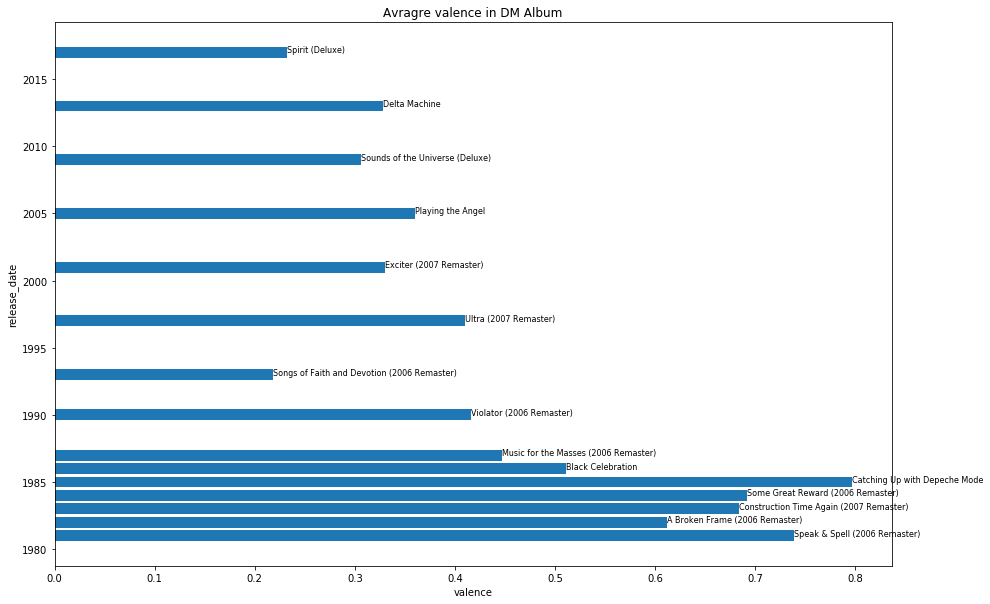

In [148]:
fig, ax = plt.subplots(figsize=(15, 10))
DfAlbum_feature = DfAlbum_feature[::-1]
ax.barh(DfAlbum_feature["release_date"], DfAlbum_feature["valence"])
for i, (value, date,name) in enumerate(zip(DfAlbum_feature["valence"], DfAlbum_feature["release_date"],DfAlbum_feature["name"])):
        ax.text(value, date,     name,           size=8, weight=200, ha='left')
    
ax.set_title('Avragre valence in DM Album')      
ax.set_xlabel('valence')
ax.set_ylabel('release_date')

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 